# Fake News Detection Using Bidirectional LSTM
## Reynara Ezra Pratama

## Introduction

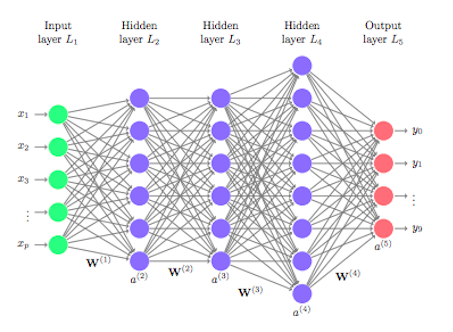
Sumber Gambar : [UC Business Analytics R Programming Guide](http://uc-r.github.io/)

*Deep Learning* adalah salah satu cabang *Machine Learning* yang memanfaatkan *Artificial Neural Network* atau Jaringan Saraf Tiruan (JST) untuk mensimulasikan fungsi otak manusia. Jaringan saraf tiruan terbentuk dari ribuan atau bahkan jutaan neuron yang saling terhubung dan ditumpuk ke dalam beberapa lapisan. Dalam sebuah jaringan saraf tiruan terdiri atas tiga jenis lapisan yaitu *input layer*, *hidden layer*, dan *output layer*.

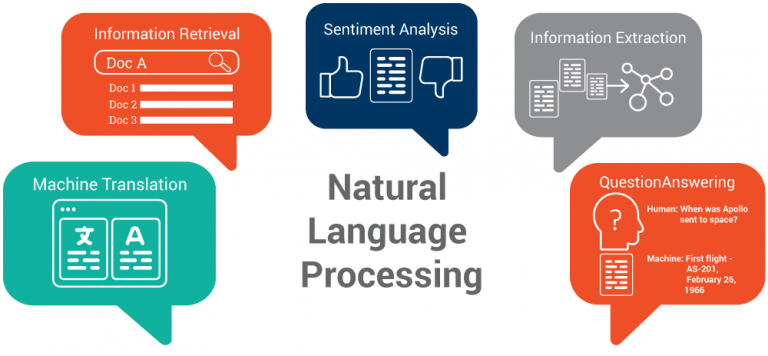
Sumber Gambar : [Medium](https://medium.com/greyatom/introduction-to-natural-language-processing-78baac3c602b)

*Natural Language Processing* atau dikenal dengan NLP adalah salah satu spesialisasi dari *Artificial Intelligence* (AI) yang berusaha untuk memahami dan mengilustrasikan mekanisme kognitif untuk memahami dan menghasilkan bahasa manusia. Melalui mekanisme tadi, NLP dapat digunakan untuk mengatasi jarak atau *gap* yang ada antara pemahaman komputer dan bahasa manusia. Dalam prakteknya, NLP berusaha untuk memproses dan menganalisis data dalam bentuk tekstual atau verbal dalam jumlah besar. Salah satu penerapan NLP adalah analisis sentimen, ekstraksi informasi, peringkasan teks, klasifikasi teks, dan pembuatan *chatbots* & *smart virtual assistants*.

## Learning Objective

Adapun tujuan dari pembuatan artikel ini adalah :
1. Mengetahui konsep dan cara kerja dari LSTM dan Bidirectional LSTM (BiLSTM)
2. Implementasi BiLSTM pada permasalahan nyata

## LSTM vs BiLSTM

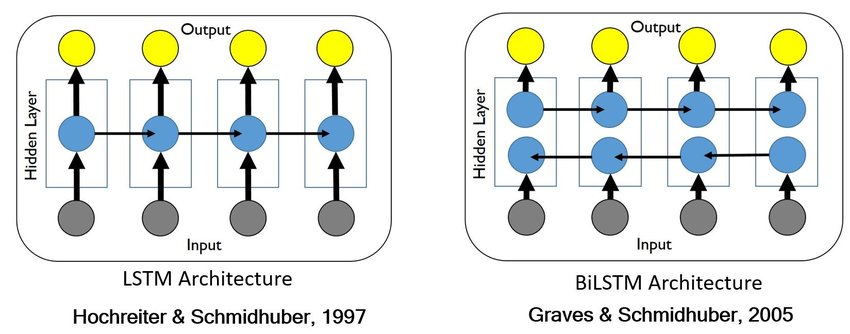
Sumber Gambar : [Researchgate.net](https://www.researchgate.net/figure/LSTM-and-BiLSTM-Architectures_fig2_324769532)

### LSTM

Sebelum membahas LSTM, kita akan mempelejari terlebih dahulu terkait *Recurrent Neural Network* (RNN). RNN adalah salah satu arsitektur *neural network* yang umum digunakan untuk data sekuensial seperti data teks, *time series* data, *audio* data, dan lainnya. Secara umum arsitektur dari RNN adalah sebagai berikut.

<img src="https://www.researchgate.net/profile/Weijiang-Feng/publication/318332317/figure/fig1/AS:614309562437664@1523474221928/The-standard-RNN-and-unfolded-RNN.png" width="500">

Sumber Gambar : [Researchgate.net](https://www.researchgate.net/profile/Weijiang-Feng/publication/318332317/figure/fig1/AS:614309562437664@1523474221928/The-standard-RNN-and-unfolded-RNN.png)

Adapun RNN mempunyai kelemahan yaitu belum mampu mengatasi masalah *vanishing/exploding gradient* dikarenakan masalah memori jangka pendek. Dikarenakan jumlah *layer* yang terlalu panjang, pada saat melakukan proses *backpropagation* menghasilkan nilai gradien yang sangat kecil atau bahkan mendekati 0 dan dianggap menghilang pada saat sampai di *layer* awal. Untuk mengatasi permasalahan tersebut, dikembangkan suatu model yang disebut *Long Short Term Memory* (LSTM). Pada LSTM sendiri mempunyai arsitektur yang sama dengan RNN yaitu sebagai berikut.

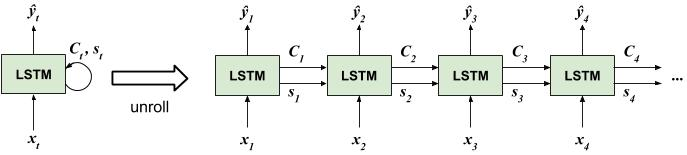
Sumber Gambar : [Algotech](https://algotech.netlify.app/blog/text-lstm/)

Perbedaan antara RNN dan LSTM adalah LSTM mempunyai informasi sinyal tambahan yang diberikan dari satu langkah ke langkah waktu berikutnya yang biasa disebut *memory cell*. Komponen dari LSTM antara lain :
1. **Forget Gate** : *Neural Network* dengan fungsi aktivasi *sigmoid* $(f)$
2. **Candidate Layer** : *Neural Network* dengan fungsi aktivasi *tanh* $(g)$
3. **Input Gate** : *Neural Network* dengan fungsi aktivasi *sigmoid* $(I)$
4. **Output Gate** : *Neural Network* dengan fungsi aktivasi *sigmoid* $(O)$
5. **Hidden State** : Vektor $(H)$
6. **Memory State** : Vektor $(C)$

<img src="https://algotech.netlify.app/img/lstm-text/lstmnet.png" width="500">

Sumber Gambar : [Algotech](https://algotech.netlify.app/blog/text-lstm/)

### Bidirectional LSTM (BiLSTM)

*Bidirectional* LSTM atau BiLSTM pada dasarnya adalah menggunakan dua buah LSTM dari arah yang berlawanan. Struktur ini memungkinkan model yang kita bangun mempunyai informasi maju dan informasi mundur pada setiap langkah yang didefinisikan sebelumnya. Menggunakan dua arah akan memungkinkan kita menjalankan input yang dimiliki ke dalam dua cara yaitu (masa lalu ke masa depan) dan (masa depan ke masa lalu). 

<img src="https://production-media.paperswithcode.com/methods/Screen_Shot_2020-05-25_at_8.54.27_PM.png" width="500">

Sumber Gambar : [paperswithcode](https://paperswithcode.com/method/bilstm)

BiLSTM akan dapat memahami konteks dari data sequential dengan baik. Misalkan kita ingin melakukan prediksi kata apa yang akan muncul selanjutnya berdasarkan kata sebelumnya. Saat kita menggunakan metode LSTM maka kita akan mempunyai kata
```
   "Saya akan pergi ke..." 
```
Kita akan memprediksi kata apa yang akan muncul setelah kalimat di atas dan akan banyak sekali kemungkinan yang bisa muncul jika melihat dari konteks kalimat yang ada. Sekarang, kita akan menggunakan metode BiLSTM sehingga kita mempunyai kata berdasarkan *Foward LSTM*
```
   "Saya akan pergi ke..."
```
dan *Backward LSTM* berupa
```
   "...untuk belajar dengan guru."
```
Terlihat bahwa ketika kita mempunyai informasi dari arah yang berlainan, akan memudahkan kita untuk melakukan prediksi.

## Case Example Using BiLSTM

### Background

Berita palsu atau sering disebut berita *hoax* telah lama muncul bahkan sebelum teknologi berkembang seperti saat ini. Adapun berita *hoax* didefinisikan sebagai sebuah artikel fiktif yang dibuat sengaja dengan tujuan untuk menipu pembaca dengan tajuk yang menarik. Perkembangan teknologi memudahkan setiap orang untuk membaca sebuah artikel yang berada di internet. Untuk seseorang yang tidak bisa membedakan sebuah artikel adalah benar atau tidak, akan memercayai isi dari artikel tersebut dan menyebarkanya kepada teman atau orang di sekitarnya. Oleh karena itu, akan dibangun sebuah model *deep learning* untuk memprediksi apakah suatu artikel dapat dikategorikan sebagai *true news* atau *fake news*. 

### Data Understanding

Dalam melakukan analisis untuk membangun model prediksi, digunakan data yang berdasal dari [Kaggle](https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset). Terdapat dua buah dataset yang kita gunakan yaitu `Fake.csv` dan `True.csv`. Dataset `Fake.csv` berisi kumpulan berita yang terindikasi *fake* atau hoax sementara dataset `True.csv` berisi kumpulan berita yang faktanya adalah benar.

Terdapat 4 buah kolom pada kedua dataset yaitu `title`, `text`, `subject`, `date`.
1. `title` : Judul berita 
2. `text` : Isi konten dari berita yang ada
3. `subject` : Subjek dari artikel berita
4. `date` : Tanggal artikel diterbitkan

### Import Library

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import tensorflow as tf
import nltk
import re

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

import warnings 
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Loading Dataset

**Load Data From Github**

In [2]:
url_fake = 'https://raw.githubusercontent.com/ReynaraEzra/Fake-News-Detection/main/data_input/Fake.csv'
url_true = 'https://raw.githubusercontent.com/ReynaraEzra/Fake-News-Detection/main/data_input/True.csv'
fake = pd.read_csv(url_fake)
true = pd.read_csv(url_true)

**Load Data From Local File**

In [3]:
# fake = pd.read_csv('data_input/Fake.csv')
# true = pd.read_csv('data_input/True.csv')

### Checking Dataset

In [4]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


### Text Preprocessing

Pertama akan dibuat kolom `label` yang akan bernilai 1 untuk *dataframe* `fake` dan 0 untuk *dataframe* `true`. 

In [6]:
fake['label'] = 1
true['label'] = 0
data = pd.concat([fake, true])
data = data.reset_index(drop=True)
data.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


Terlihat bahwa terdapat 44898 artikel yang ada pada `data` dengan total 5 buah kolom yang terdiri atas 1 kolom bertipe *integer* dan 4 kolom bertipe *object*.

Definisikan fungsi untuk kebutuhan plotting.

In [8]:
def make_count_plot(data, xlabel, size_x, size_y):
    plt.figure(figsize=(size_x, size_y))
    p = sns.countplot(data)
    plt.xlabel(xlabel, fontsize=12)
    p.set_xticklabels(['True News', 'Fake News'])
    plt.ylabel('Frequency', fontsize=12)
    plt.title(f'Number of Article Based on {xlabel}', fontsize=15)
    plt.show()

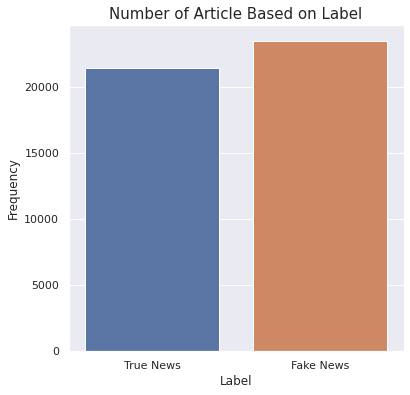

Jumlah Artikel yang dikategorikan Fake News : 23481
Jumlah Artikel yang dikategorikan True News : 21417


In [9]:
make_count_plot(data['label'], 'Label', 6, 6)
print(f"Jumlah Artikel yang dikategorikan Fake News : {data[data['label']==1].shape[0]}")
print(f"Jumlah Artikel yang dikategorikan True News : {data[data['label']==0].shape[0]}")

Jumlah artikel yang dikategorikan ke dalam *Fake News* dan *True News* sudah seimbang, maka tidak perlu dilakukan proses *downsampling* atau *upsampling* pada data.

Dikarenakan kita ingin memprediksi sebuah artikel dikategorikan sebagai *true news* atau *fake news*, kita akan membuang kolom `subject` dan `date` karena tidak memuat informasi yang dibutuhkan. Kolom `title` tidak dibuang karena nanti berisi informasi pendukung untuk mengkategorikan suatu artikel adalah *true news* atau *fake news*.

In [10]:
df = data.drop(['subject', 'date'], axis=1)

In [11]:
df.head()

,title,text,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,1


Gabungkan judul yang ada pada kolom `title` dan isi artikel yang ada pada kolom `text` ke dalam kolom baru `content`.

In [12]:
df['content'] = df['title'] + ' ' + df['text']

In [13]:
df.head()

,title,text,label,content
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,1,Donald Trump Sends Out Embarrassing New Year’...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,1,Drunk Bragging Trump Staffer Started Russian ...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",1,Sheriff David Clarke Becomes An Internet Joke...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",1,Trump Is So Obsessed He Even Has Obama’s Name...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,1,Pope Francis Just Called Out Donald Trump Dur...


Dikarenakan sudah dilakukan penggabungan, kolom `title` dan `text` dapat dibuang.

In [14]:
df = df.drop(['title', 'text'], axis=1)[['content', 'label']]

In [15]:
df.head()

,content,label
0,Donald Trump Sends Out Embarrassing New Year’...,1
1,Drunk Bragging Trump Staffer Started Russian ...,1
2,Sheriff David Clarke Becomes An Internet Joke...,1
3,Trump Is So Obsessed He Even Has Obama’s Name...,1
4,Pope Francis Just Called Out Donald Trump Dur...,1


Definisikan fungsi `text_preprocessing` yang akan melakukan *processing* pada teks dengan membuang karakter selain huruf, mengubah karakter menjadi *lower case*, membuang *stop words*, dan melakukan proses lemmatisasi untuk mengembalikan kata kepada kata dasarnya.

In [29]:
def text_preprocessing(texts):
    text_list = []
    for i in range(len(texts)):
        text_process = re.sub('[^a-zA-Z]', ' ', texts[i]).lower().split()
        text_process = [word for word in text_process if not word in stop_en]
        text_process = [lemmatizer.lemmatize(word) for word in text_process]
        combined = ''
        for text in text_process:
            combined = combined + text + ' '
        text_list.append(combined)
    return text_list

Dilakukan proses pengacakan pada dataset.

In [30]:
df = df.sample(frac=1).reset_index(drop=True)

In [31]:
news = df['content'].copy()
target = df['label'].copy()

Lakukan *preprocessing* pada teks dan simpan ke dalam `news`. Selain itu simpan nilai label dari artikel tersebut ke dalam `target`.

In [32]:
news = text_preprocessing(news)

In [33]:
target = target.values

### Build Model

Sebelum membangun model, akan dibagi dataset kita ke dalam train data dan test data dengan proporsi train data sebanyak 80% dan test data sebanyak 20%.

In [34]:
X_train, X_test, y_train, y_test = train_test_split(news, target, test_size=0.2, random_state=0)

Lakukan proses tokenisasi pada data teks dan lakukan proses *padding* agar panjang kata dari setiap artikel sama.

In [35]:
tokenizer = Tokenizer(num_words=20000, oov_token='-')
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)

sequence_train = tokenizer.texts_to_sequences(X_train)
sequence_test = tokenizer.texts_to_sequences(X_test)

pad_train = pad_sequences(sequence_train)
pad_test = pad_sequences(sequence_test)

Bangun sebuah model *sequential* dengan arsitektur *neural network* seperti yang didefinisikan pada *code* di bawah. Untuk dapat menerapkan proses **`Bidirectional LSTM`**, kita cukup memanggil *class* `Bidirectional` pada *layer* LSTM. Pada *output layer* akan berisi 1 unit dengan fungsi aktivasi *sigmoid*.

In [36]:
model = tf.keras.models.Sequential([
   tf.keras.layers.Embedding(input_dim=20000, output_dim=64),
   tf.keras.layers.Bidirectional(
       tf.keras.layers.LSTM(64)
       ),
   tf.keras.layers.Dropout(0.2),
   tf.keras.layers.Dense(32, activation='relu'),
   tf.keras.layers.Dropout(0.25),
   tf.keras.layers.Dense(16, activation='relu'),
   tf.keras.layers.Dropout(0.5),
   tf.keras.layers.Dense(1, activation='sigmoid')
])

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          1280000   
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                4128      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0

Pada proses `.compile()`, digunakan optimizer berupa `Adam`, dengan loss function berupa `binary_crossentropy` dikarenakan kelas yang kita miliki berupa biner, dan penggunaaan metrics berupa *accuracy* untuk melihat seberapa baik model kita melakukan klasifikasi pada teks.

In [39]:
model.compile(
    optimizer= 'Adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

Lakukan `.fit()` untuk melakukan proses training pada model. Definisikan parameter `epochs` sebanyak 30 dan `batch_size` sebanyak 64.

In [40]:
history = model.fit(
    pad_train,
    y_train,
    epochs = 10,
    batch_size = 64,
    validation_data = (pad_test, y_test),
    verbose = 1
)

Epoch 1/10
562/562 [==============================] - 604s 1s/step - loss: 0.2229 - accuracy: 0.9136 - val_loss: 0.0849 - val_accuracy: 0.9700
Epoch 2/10
562/562 [==============================] - 589s 1s/step - loss: 0.0699 - accuracy: 0.9787 - val_loss: 0.0614 - val_accuracy: 0.9815
Epoch 3/10
562/562 [==============================] - 589s 1s/step - loss: 0.0331 - accuracy: 0.9892 - val_loss: 0.0559 - val_accuracy: 0.9867
Epoch 4/10
562/562 [==============================] - 588s 1s/step - loss: 0.0461 - accuracy: 0.9847 - val_loss: 0.0610 - val_accuracy: 0.9835
Epoch 5/10
562/562 [==============================] - 588s 1s/step - loss: 0.0620 - accuracy: 0.9806 - val_loss: 0.0745 - val_accuracy: 0.9818
Epoch 6/10
562/562 [==============================] - 589s 1s/step - loss: 0.0210 - accuracy: 0.9922 - val_loss: 0.0688 - val_accuracy: 0.9816
Epoch 7/10
562/562 [==============================] - 588s 1s/step - loss: 0.0120 - accuracy: 0.9969 - val_loss: 0.0758 - val_accuracy: 0.9894

Simpan model ke dalam `model.h5`.

In [41]:
model.save('model.h5')

Definisikan fungsi untuk melakukan plot *accuracy* dan *loss* dari model yang telah dilakukan proses *training*.

In [42]:
def plot_accuracy(history):
    plt.figure(figsize=(18,5))
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(len(acc))
    plot_acc = plt.plot(epochs, acc, 'red', label='Training Accuracy')
    plot_val_acc = plt.plot(epochs, val_acc, 'blue', label='Validation Accuracy')
    plt.xlabel('Epoch', fontsize=15)
    plt.ylabel('Accuracy', fontsize=15)
    plt.title('Training and Validation Accuracy', fontsize=25)
    plt.legend(bbox_to_anchor=(1,1), loc='best')
    plt.grid()
    plt.show()

def plot_loss(history):
    plt.figure(figsize=(18,5))
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(loss))
    plot_loss = plt.plot(epochs, loss, 'red', label='Training Loss')
    plot_val_loss = plt.plot(epochs, val_loss, 'blue', label='Validation Loss')
    plt.xlabel('Epoch', fontsize=15)
    plt.ylabel('Loss', fontsize=15)
    plt.title('Training and Validation Loss', fontsize=25)
    plt.legend(bbox_to_anchor=(1,1), loc='best')
    plt.grid()
    plt.show()

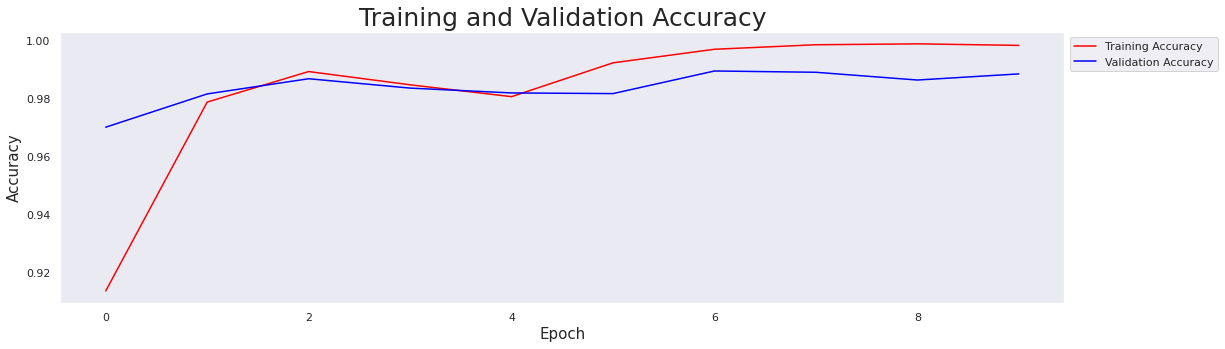

In [43]:
plot_accuracy(history)

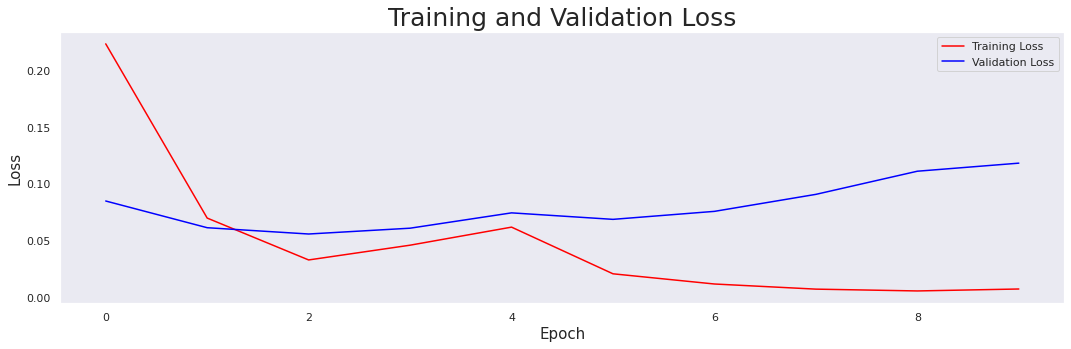

In [44]:
plot_loss(history)

Hitung nilai *accuracy* pada *training* dan *test data*

In [45]:
train_stats = model.evaluate(pad_train,y_train)
test_stats = model.evaluate(pad_test,y_test)
print(f'Training Accuracy:{train_stats[1]*100} %')
print(f'Testing Accuracy:{test_stats[1]*100} %')

281/281 [==============================] - 119s 422ms/step - loss: 0.1181 - accuracy: 0.9884
Training Accuracy:99.91647601127625 %
Testing Accuracy:98.8418698310852 %


Diperoleh nilai *accuracy* sebesar 99.91647601127625% untuk *training data* dan 98.8418698310852% untuk *test data*.

In [50]:
y_pred = model.predict(pad_test)
y_prob_pred = y_pred.reshape(8980)
y_pred_label = y_prob_pred
for i in range(len(y_prob_pred)):
    if y_prob_pred[i] >= 0.5:
        y_pred_label[i] = 1
    else:
        y_pred_label[i] = 0

In [80]:
print("Classification Report : \n ", classification_report(y_test,y_pred_label))

Classification Report : 
                precision    recall  f1-score   support

           0       0.99      0.99      0.99      4328
           1       0.99      0.99      0.99      4652

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [89]:
def make_confusion_matrix(pred):
    cam = confusion_matrix(y_test, pred)
    sns.heatmap(cam, annot=True, cmap='viridis', 
                xticklabels=['True News', 'Fake News'],
                yticklabels=['True News', 'Fake News'],
                fmt="d")
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    plt.title('Confusion Matrix', fontsize=15)
    plt.show()

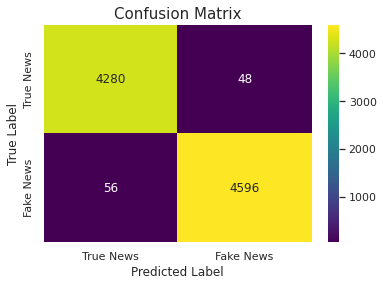

In [90]:
make_confusion_matrix(label_y)

Berdasarkan *confusion matrix* di atas, terlihat untuk model yang dibangun sudah dapat mengkategorikan suatu artikel adalah *true news* atau *fake news* dengan baik. Pada model tersebut, hanya terdapat 104 artikel yang mengalami kesalahan dalam proses klasifikasi dari keseluruhan *test data*.

## Conclusion

Pada artikel ini, kita telah mempelajari terkait model LSTM dan BiLSTM dan penerapannya dalam permasalahan nyata. Untuk itu dapat diperoleh beberapa kesimpulan :
1. Model *Long Short Term Memory* (LSTM) dan *Bidirectional Long Short Term Memory* (BiLSTM) dapat digunakan untuk data yang bertipe sekuensial dan dapat digunakan untuk mengatasi permasalahan *vanishing/exploding* gradien yang muncul saat menggunakan *Recurrent Neural Network*.
2. Model *Bidirectional Long Short Term Memory* (BiLSTM) dapat digunakan saat kita ingin membangun model yang untuk memahami karakteristik data sekuensial kita dengan dua buah sudut pandang yaitu mundur-maju dan maju-mundur. Hal ini dapat digunakan untuk memahami teks yang sangat panjang untuk memahami i